<h3>1. Importing Libraries 📚</h3>

In [126]:
# data manipulation and visualization libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# classification algorithms from the scikit-learn library.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb # XGBoost algorithm

# preprocessing techniques from the scikit-learn library.
from sklearn.preprocessing import MinMaxScaler 

# model selection techniques from the scikit-learn library.
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint # used for random integer values

from sklearn.model_selection import StratifiedKFold # for stratified cross validation
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report # evaluation metrics

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
%matplotlib inline

<h3>2. Reading Dataset 👀</h3>

In [127]:
df = pd.read_csv('churn_raw_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3>3. Checking Missing Values 🚫</h3>

In [128]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h3>4. Data Vizualization 📊</h3>

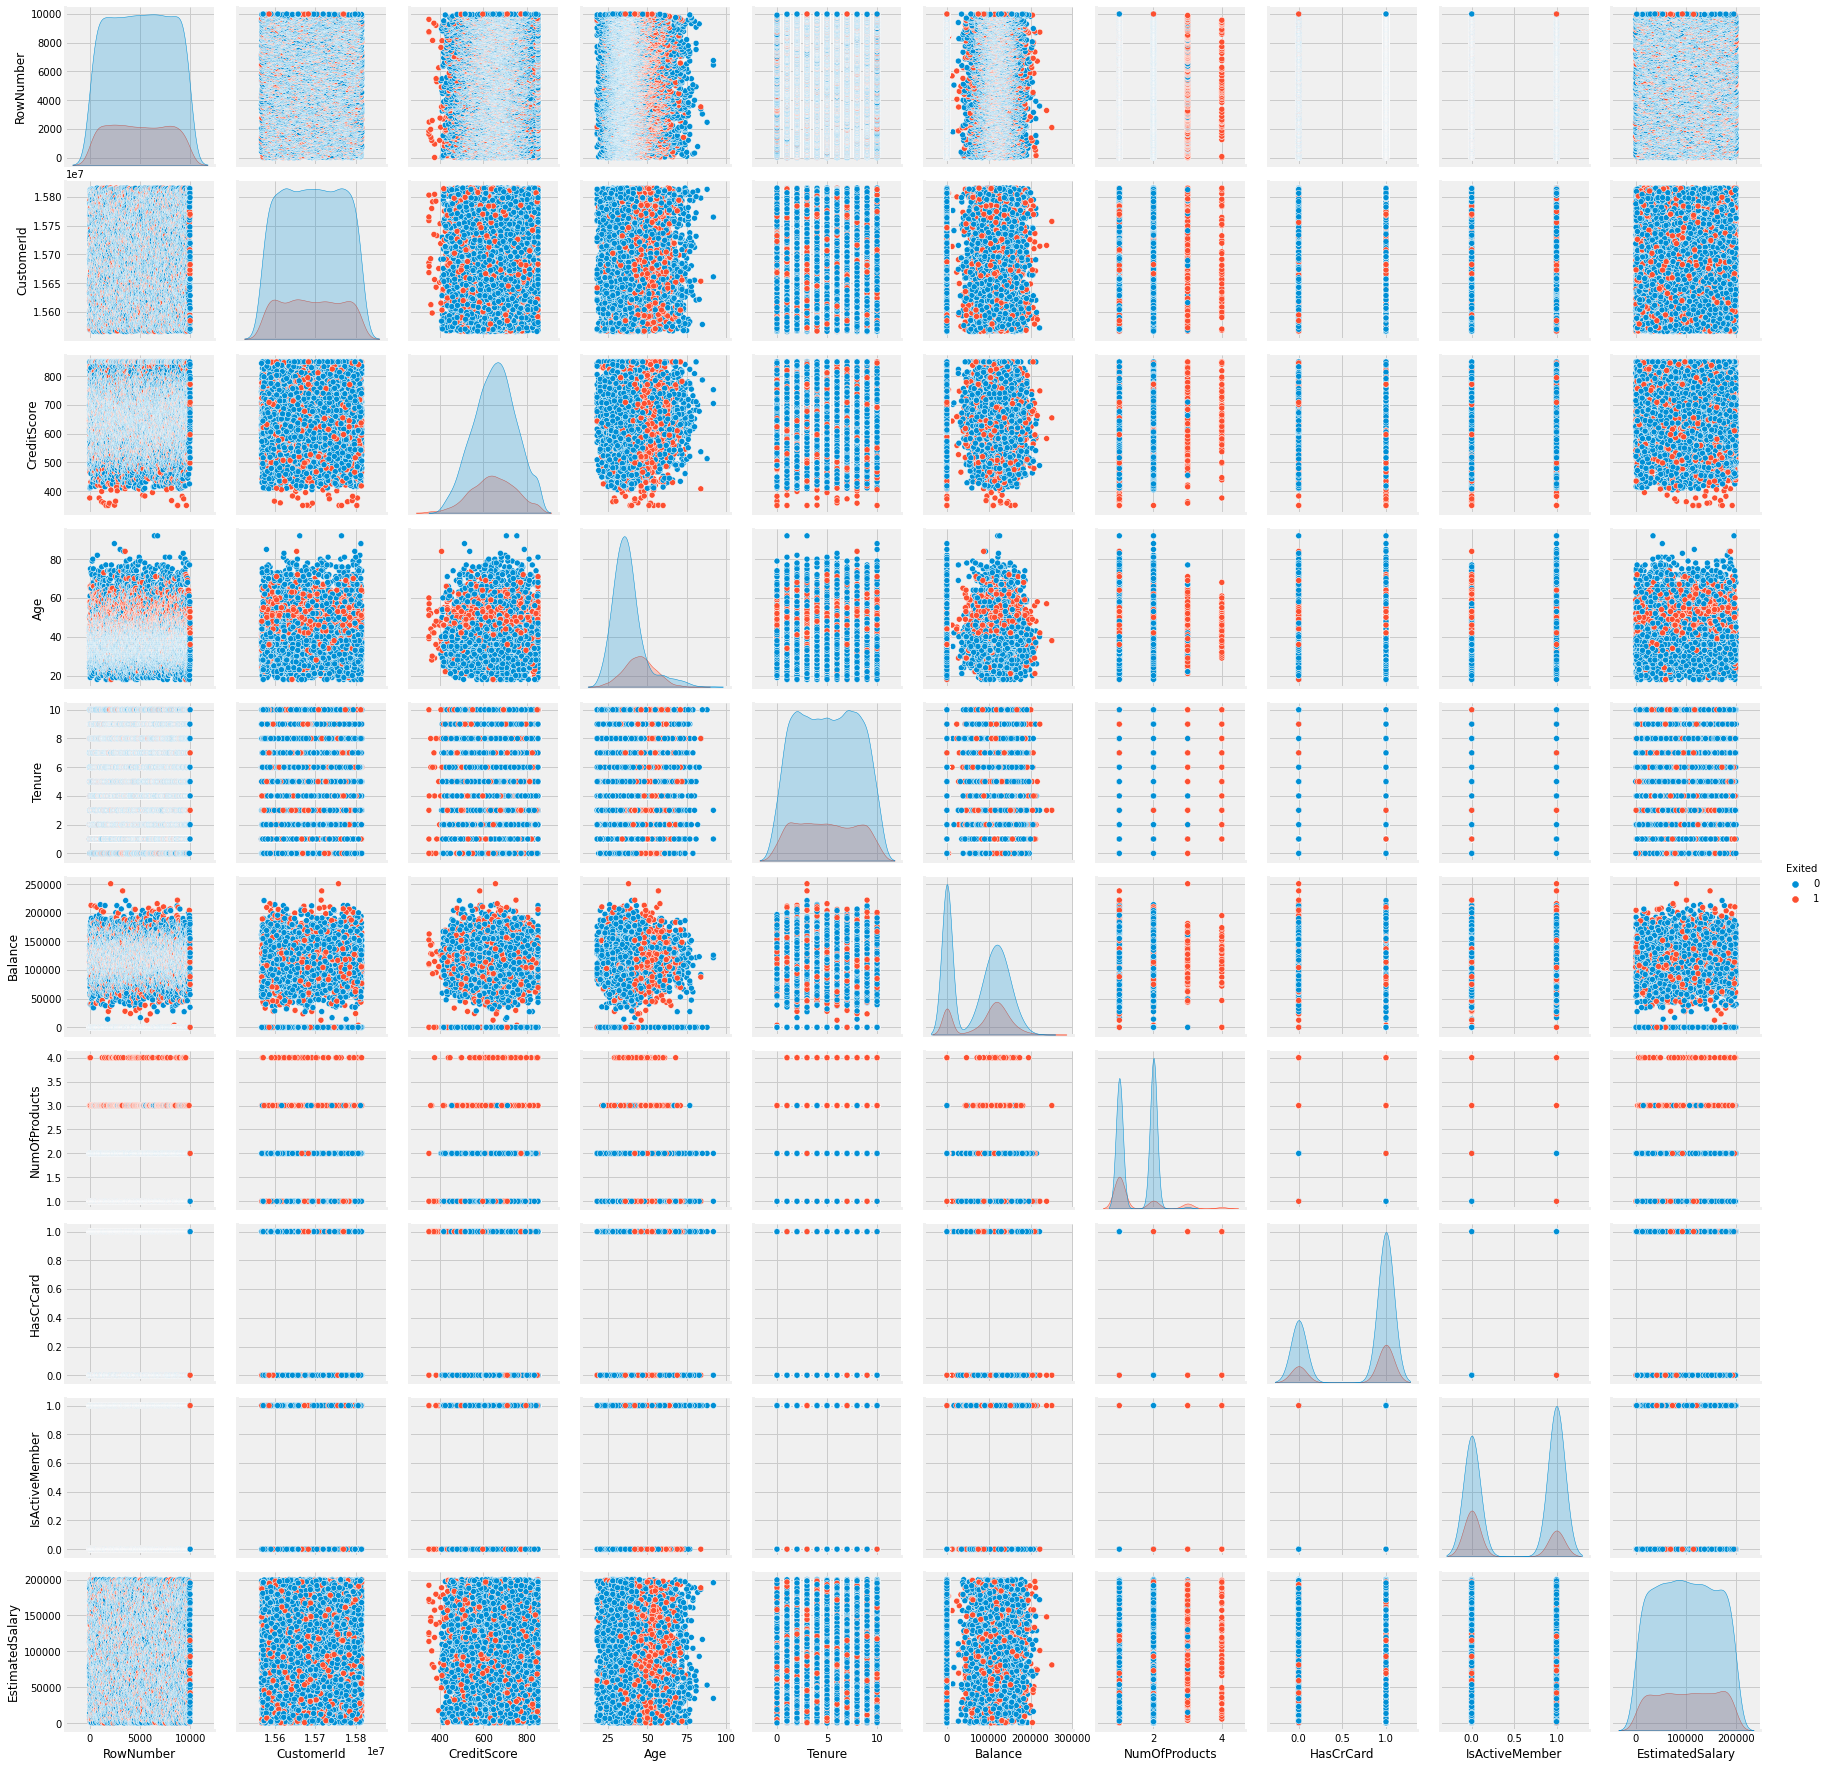

In [129]:
sns.pairplot(df, hue = 'Exited', diag_kws={'bw': 0.2})
plt.show()

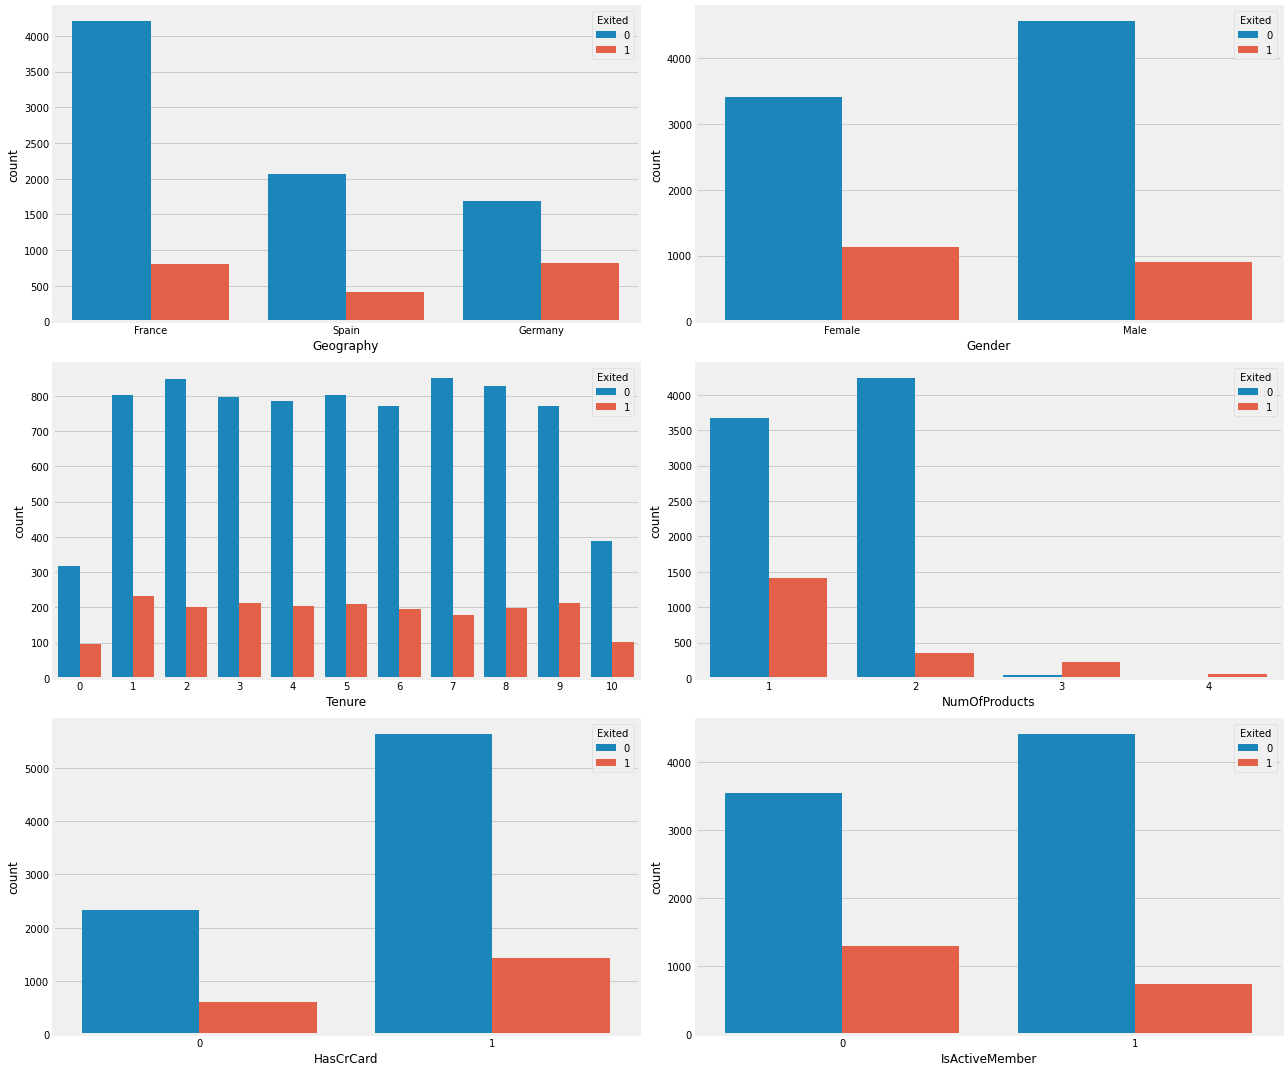

In [130]:
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1])
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2][1])

plt.tight_layout()
plt.show()

0    7963
1    2037
Name: Exited, dtype: int64

Exited represent 20.37% of dataset.



<AxesSubplot: xlabel='Exited', ylabel='count'>

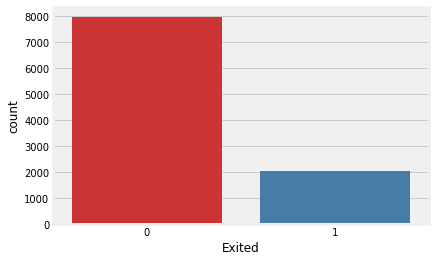

In [131]:
print(df['Exited'].value_counts())
print("\nExited represent {:.2f}% of dataset.\n".format((df[df['Exited'] == 1].shape[0] / df.shape[0]) * 100))
sns.countplot(x='Exited', data=df, palette="Set1")

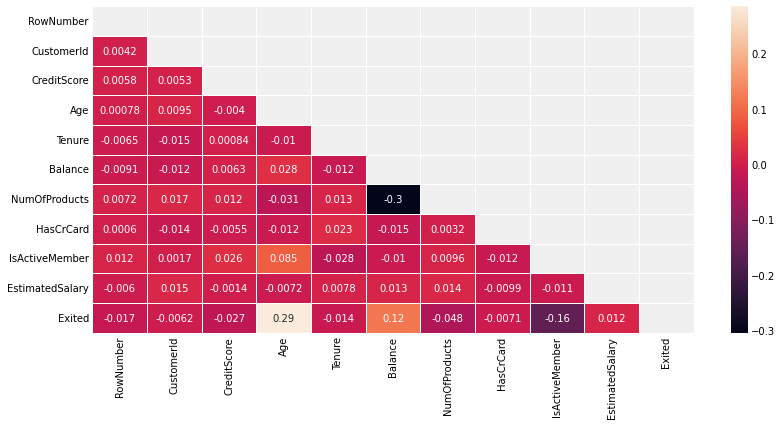

In [132]:
plt.figure(figsize=(12, 6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

👆 Looking to the correlation plot we can say that there is no multicolinearity present in data

<h3>5. Data Preprocessing 🛠</h3>

In [133]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [135]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [136]:
unique_values = df.apply(lambda x: x.unique())
unique_values

CreditScore        [619, 608, 502, 699, 850, 645, 822, 376, 501, ...
Geography                                   [France, Spain, Germany]
Gender                                                [Female, Male]
Age                [42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2...
Tenure                            [2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]
Balance            [0.0, 83807.86, 159660.8, 125510.82, 113755.78...
NumOfProducts                                           [1, 3, 2, 4]
HasCrCard                                                     [1, 0]
IsActiveMember                                                [1, 0]
EstimatedSalary    [101348.88, 112542.58, 113931.57, 93826.63, 79...
Exited                                                        [1, 0]
dtype: object

In [137]:
print(df['Geography'].value_counts())
print('\n')
print(df['Gender'].value_counts())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Male      5457
Female    4543
Name: Gender, dtype: int64


In [138]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [139]:
scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,1,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,2,1,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0,1,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0,1,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,2,1,0.337838,2,0.500246,1,1,1,0.395400,0


<h3>6. Creating Models 🤖</h3>

In [140]:
X = df.drop('Exited', axis=1)
y = df['Exited']

StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=80)

for train_index, test_index in StratifKfold.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [141]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

In [142]:
results = []

for key, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train) # predict on train data
    y_test_pred = model.predict(X_test) # predict on test data

    # evaluate the model
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    results.append({
        'Model': key,
        'Train Score': train_score,
        'Test Score': test_score,
        'Precision Score': precision,
        'Recall Score': recall,
        'F1 Score': f1,
        'Details': 'Default'
    })

df_models = pd.DataFrame(results)

In [143]:
df_models.sort_values(by='F1 Score', ascending=False)

,Model,Train Score,Test Score,Precision Score,Recall Score,F1 Score,Details
3,Random Forest,1.000000,0.8615,0.746212,0.484029,0.587183,Default
2,DecisionTreeClassifier,1.000000,0.7850,0.474388,0.523342,0.497664,Default
1,KNearest,0.859125,0.8135,0.580189,0.302211,0.397415,Default
0,LogisticRegression,0.810250,0.8040,0.557252,0.179361,0.271375,Default


Looking at the dataframe above, we can see that the random forest model performs better.<br><br>Let's tune it to see if we can improve its performance

<h3>6.1 Random Forest Classifier 🌲</h3>

<div style="padding-left: 20px; padding-right: 20px;">
    <h3>6.1.1 Default Model</h3>
</div>


Train Accuracy Score: 1.0
Test Accuracy Score: 0.8555


Classificatio Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.49      0.58       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.84      0.86      0.84      2000

Confusion Matrix:


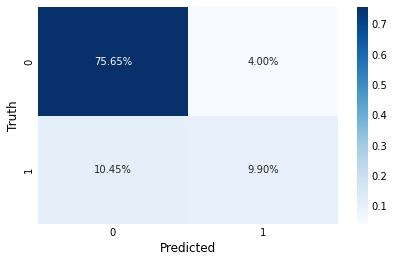

In [144]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print(f'Train Accuracy Score: {accuracy_score(y_train, y_train_pred)}')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
print('\n')
print('Classificatio Report:')
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix:')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth');

<div style="padding-left: 20px; padding-right: 20px;">
    <h3>6.1.2 Tuned Model 🚀</h3>
</div>

In [145]:
param_grid = {
    'n_estimators': randint(100, 1000),  
    'max_depth': [None, 5, 10, 20],  
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5),  
    'max_features': ['sqrt', 'log2'],  
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]  
}

In [146]:
rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  
    cv=5,  
    scoring='accuracy'
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 490}
Best Score: 0.86525


Train Accuracy Score: 0.94825
Test Accuracy Score: 0.8575


Classification report 
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1593
           1       0.73      0.47      0.57       407

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:


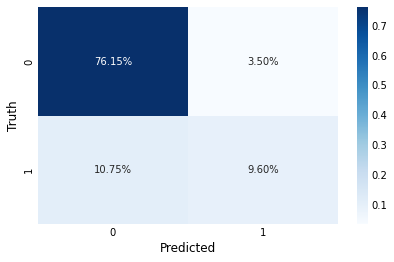

In [147]:
best_rf = random_search.best_estimator_

best_rf.fit(X_train, y_train)

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print(f'Train Accuracy Score: {accuracy_score(y_train, y_train_pred)}')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
print('\n')
print('Classification report ')
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix:')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth');

<h3>6.2 XGBoost</h3>


<div style="padding-left: 20px; padding-right: 20px;">
    <h3>6.2.1 Default Model</h3>
</div>

Train Accuracy Score: 0.955875
Test Accuracy Score: 0.848


Classification report 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.68      0.49      0.57       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:


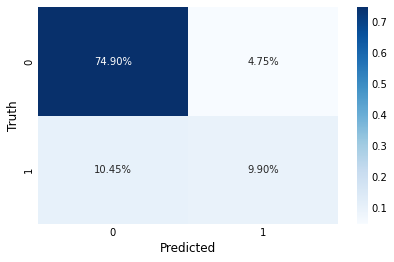

In [148]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

print(f'Train Accuracy Score: {accuracy_score(y_train, y_train_pred)}')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
print('\n')
print('Classification report ')
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix:')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth');

<div style="padding-left: 20px; padding-right: 20px;">
    <h3>6.2.2 Tuned Model 🚀</h3>
</div>

In [149]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf = RandomizedSearchCV(xgb_model,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.867 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.865 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.859 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.877 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.856 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.858 total time=   0.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=1;, score=0.853 total time=   0.3s
[CV 3/5] END colsample_bytre

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           eval_metric='logloss', gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimato...
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [150]:
print(f'Best Parameters: {clf.best_params_}')

Best Parameters: {'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [151]:
print(f'Best Model: {clf.best_estimator_}')

Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


Train Accuracy Score: 0.87975
Test Accuracy Score: 0.862


Classification report 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:


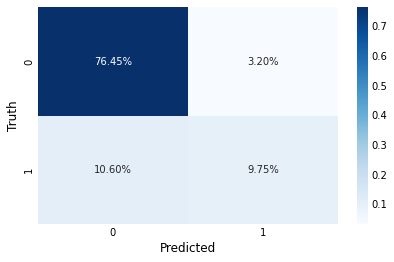

In [152]:
final_model = clf.best_estimator_
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

print(f'Train Accuracy Score: {accuracy_score(y_train, y_train_pred)}')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_test_pred)}')
print('\n')
print('Classification report ')
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

print('Confusion Matrix:')
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth');

<h3>7. Testing the final model to unseen data </h3>

In [153]:
unseen_data = pd.read_csv('new_unseen_data.csv')
unseen_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [154]:
unseen_data2 = unseen_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
                            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

In [155]:
scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()
unseen_data2[scale_vars] = scaler.fit_transform(unseen_data2[scale_vars])

In [156]:
unseen_data2['Geography'] = unseen_data2['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
unseen_data2['Gender'] = unseen_data2['Gender'].map({'Male' : 0, 'Female' : 1})

In [157]:
unseen_pred = final_model.predict(unseen_data2)
unseen_pred_prob = final_model.predict_proba(unseen_data2)

In [158]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [159]:
output = unseen_data.copy()
output['Predictions - Churn or Not'] = unseen_pred
output['Predictions - Probability to Churn'] = column(unseen_pred_prob, 1)
output['Predictions - Churn or Not Desc'] = 'Empty'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 0] = 'Retention'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 1] = 'Churn'

In [160]:
output.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.339375,Retention
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.281226,Retention
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0.967580,Churn
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.068928,Retention
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.175909,Retention


<h3>8. Saving the Predictions 💾</h3>

In [161]:
output.to_csv('churn_predict.csv', index=False)

Now that we have the DataFrame with our predictions, we can proceed to create a comprehensive dashboard for analysis.